In [2]:
import numpy as np
import pandas as pd

In [3]:
ratings = pd.read_csv("Desktop/Book recommendation/Ratings.csv")
users = pd.read_csv("Desktop/Book recommendation/Users.csv")
books = pd.read_csv("Desktop/Book recommendation/Books.csv")

C:\Users\Siddhi\AppData\Local\Temp\ipykernel_28284\4193059408.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Desktop/Book recommendation/Books.csv")


In [4]:
# books.head()
book_list = books[['Book-Title']]
books.head()
# list(books['Book-Title'].values)[2]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# missing data
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [7]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [8]:
# merge books and ratings based on ISBN column
ratings_with_name = ratings.merge(books, on='ISBN')

In [9]:
# group by the number of ratings for each book
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating': 'num_ratings'},inplace=True)
num_rating_df


,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [10]:
# group by the average ratings for each book
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_ratings'},inplace=True)
avg_rating_df


C:\Users\Siddhi\AppData\Local\Temp\ipykernel_28284\4290706254.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [11]:
# merge num_rating_df and avg_rating_df
popularity_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popularity_df


,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [12]:
# only keep the books whose number of ratings are more than 250
popularity_df[popularity_df['num_ratings']>=250].sort_values('avg_ratings', ascending=False)


,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [13]:
# Top 50 books
popularity_df = popularity_df[popularity_df['num_ratings']>=250].sort_values('avg_ratings', ascending=False).head(50)


In [14]:
popularity_df = popularity_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'avg_ratings']]
popularity_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [15]:
print(ratings.columns)
print(avg_rating_df.columns)


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Index(['Book-Title', 'avg_ratings'], dtype='object')


In [16]:
ratings_with_name = ratings.merge(books[['ISBN', 'Book-Title']], on='ISBN')


In [17]:
ratings_with_avg = ratings_with_name.merge(avg_rating_df, on='Book-Title')


In [18]:
# Merge ratings and avg_rating_df based on 'Book-Title'
ratings_with_avg = ratings_with_name.merge(avg_rating_df, on='Book-Title')

# Define y_true as the actual ratings
y_true = ratings_with_avg['Book-Rating']

# Define y_pred as the predicted ratings (average ratings from avg_rating_df)
y_pred = ratings_with_avg['avg_ratings']

# At this point, y_true and y_pred should be arrays/lists of equal length,
# representing the true and predicted ratings for each book-rating pair in the dataset.

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error

# Assuming y_true is the true ratings and y_pred is the predicted ratings
# Replace these with your actual true and predicted ratings

# For rating prediction tasks
# Calculate mean absolute error
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error: {mae}")

# Set threshold for top-N recommendation tasks
threshold = 4  # Adjust threshold as needed

# Convert true ratings and predicted ratings into binary (0/1) for top-N recommendations
y_true_binary = (y_true >= threshold).astype(int)
y_pred_binary = (y_pred >= threshold).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_binary, y_pred_binary, average='binary')
recall = recall_score(y_true_binary, y_pred_binary, average='binary')
f1 = f1_score(y_true_binary, y_pred_binary, average='binary')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Mean Absolute Error: 2.6184601028994092
Precision: 0.7037883429409634
Recall: 0.4198064385330303
F1 Score: 0.525910021304148


In [20]:
# users who have rated more than 200 times
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
educated_users = x[x].index


In [21]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(educated_users)]

In [22]:
# books which have been rated more than 50 times
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [23]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [24]:
# drop the duplicate values if any
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title
63,278418,0446520802,0,The Notebook
65,3363,0446520802,0,The Notebook
66,7158,0446520802,10,The Notebook
69,11676,0446520802,10,The Notebook
74,23768,0446520802,6,The Notebook
...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye
1027923,269566,0670809381,0,Echoes
1028777,271284,0440910927,0,The Rainmaker
1029070,271705,B0001PIOX4,0,Fahrenheit 451


In [25]:

# contains books which have been rated atleast 50 times and users who have rated more than 200 books
pt = final_ratings.pivot_table(index='Book-Title', columns = 'User-ID', values = 'Book-Rating')

In [26]:
# replace NaN with 0
pt.fillna(0,inplace=True)

In [27]:
# books x columns
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
similarity_score = cosine_similarity(pt)

In [30]:
similarity_score


array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [31]:
# sort the books which are more similar to each other
sorted(list(enumerate(similarity_score[0])), key=lambda x:x[1],reverse=True)[1:13]

[(47, 0.2702651417103732),
 (545, 0.26396193711234966),
 (82, 0.2366937434740099),
 (634, 0.23299389358170397),
 (551, 0.2262639743141286),
 (181, 0.22222254415660225),
 (500, 0.21057743765309012),
 (344, 0.20675540390453995),
 (554, 0.20025063706783053),
 (520, 0.19972624710300058),
 (527, 0.19656287691544358),
 (488, 0.19511819825564608)]

In [32]:
def recommend(book_name):
    # fetch index from book name
    index = np.where(pt.index == book_name)[0][0]
    #distances = similarity_score[index]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1],reverse=True)[1:13]
    
    data = []
    for i in similar_items:
        item = []
        # print(pt.index[i[0]])
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
        
    return data

In [33]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ["Charlotte's Web (Trophy Newbery)",
  'E. B. White',
  'http://images.amazon.com/images/P/0064400557.01.MZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg'],
 ['The Witness

In [44]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, precision_score, recall_score, f1_score

# Convert y_true and y_pred to Pandas DataFrames
y_true_df = pd.Series(y_true, name='y_true').to_frame()
y_pred_df = pd.DataFrame(y_pred)

# Merge y_true_df and y_pred_df based on index to align the data
# Note: If necessary, consider using other columns (user-book pairs) for merging
aligned_df = y_true_df.join(y_pred_df, how='inner')

# Filter out rows with NaN values in either `y_true` or `y_pred`
aligned_df = aligned_df.dropna()

# Extract aligned `y_true` and `y_pred`
y_true_aligned = aligned_df['y_true'].values
y_pred_aligned = aligned_df.drop('y_true', axis=1).values.flatten()


# Ensure `y_true_aligned` and `y_pred_aligned` have the same length
assert len(y_true_aligned) == len(y_pred_aligned), "y_true and y_pred lengths do not match"

# Calculate MAE, precision, recall, and F1 score
mae = mean_absolute_error(y_true_aligned, y_pred_aligned)
print(f"Mean Absolute Error: {mae}")

# Define a threshold for binary classification (top-N recommendation tasks)
threshold = 8  # Adjust as needed

# Convert y_true and y_pred to binary form based on the threshold
y_true_binary = (y_true_aligned >= threshold).astype(int)
y_pred_binary = (y_pred_aligned >= threshold).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_binary, y_pred_binary, average='binary')
print(f"Precision: {precision}")

recall = recall_score(y_true_binary, y_pred_binary, average='binary')
print(f"Recall: {recall}")

f1 = f1_score(y_true_binary, y_pred_binary, average='binary')
print(f"F1 Score: {f1}")


Mean Absolute Error: 2.6184601028994092
Precision: 0.9675849639546859
Recall: 0.16791699991510542
F1 Score: 0.2861711727147083


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD

# Prepare the book metadata DataFrame
# Combine textual features such as title, author, and genre
books_metadata = books['Book-Title'].astype(str) + ' ' + books['Book-Author'].astype(str)

# Handle NaN values in books_metadata
books_metadata = books_metadata.fillna('')

# Vectorize the book metadata using TF-IDF
vectorizer = TfidfVectorizer()
metadata_vectors = vectorizer.fit_transform(books_metadata)

# Optional: Reduce dimensionality of feature vectors
# Adjust n_components to further reduce memory usage
svd = TruncatedSVD(n_components=50)
metadata_vectors_reduced = svd.fit_transform(metadata_vectors)

# Use NearestNeighbors to find the most similar books
# Adjust n_neighbors as needed
num_neighbors = 10  # Number of nearest neighbors to find for each book
nn_model = NearestNeighbors(n_neighbors=num_neighbors, metric='cosine')
nn_model.fit(metadata_vectors_reduced)

# Function to recommend similar books based on a given book title
def recommend_content_based(book_title, num_recommendations=5):
    # Get the index of the book in the metadata
    book_index = books[books['Book-Title'] == book_title].index[0]
    
    # Find the indices of the nearest neighbors (most similar books)
    _, indices = nn_model.kneighbors([metadata_vectors_reduced[book_index]])
    
    # Exclude the first neighbor (the given book itself)
    recommended_books_indices = indices[0][1:num_recommendations + 1]
    
    # Return the recommended book titles
    recommended_books = [books.iloc[idx]['Book-Title'] for idx in recommended_books_indices]
    return recommended_books

# Example usage: recommend books similar to 'Harry Potter and the Chamber of Secrets (Book 2)'
book_title = 'Harry Potter and the Chamber of Secrets (Book 2)'
recommended_books = recommend_content_based(book_title, num_recommendations=5)
print(f"Books similar to '{book_title}':")
for book in recommended_books:
    print(f"- {book}")


Books similar to 'Harry Potter and the Chamber of Secrets (Book 2)':
- Harry Potter and the Chamber of Secrets (Book 2)
- Harry Potter and the Chamber of Secrets (Book 2)
- Harry Potter and the Chamber of Secrets Postcard Book
- Harry Potter and the Chamber of Secrets (Book 2, Audio)
- Harry Potter and the Prisoner of Azkaban (Book 3)


In [42]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error


# Merge ratings and books data
ratings_with_books = ratings.merge(books, on='ISBN')

# Prepare the book metadata DataFrame
books_metadata = books['Book-Title'].astype(str) + ' ' + books['Book-Author'].astype(str)
books_metadata = books_metadata.fillna('')

# Vectorize book metadata using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
metadata_vectors = vectorizer.fit_transform(books_metadata)

# Reduce dimensionality using TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Adjust n_components as needed
metadata_vectors_reduced = svd.fit_transform(metadata_vectors)

# Use NearestNeighbors to find the most similar books
from sklearn.neighbors import NearestNeighbors
num_neighbors = 20  # Adjust the number of neighbors as needed
nn_model = NearestNeighbors(n_neighbors=num_neighbors, metric='cosine')
nn_model.fit(metadata_vectors_reduced)

# Function to recommend similar books based on a given book title
def recommend_content_based(book_title, num_recommendations=10):
    # Get the book index
    book_index = books[books['Book-Title'] == book_title].index[0]
    
    # Find the indices of the nearest neighbors (similar books)
    _, indices = nn_model.kneighbors([metadata_vectors_reduced[book_index]])
    
    # Exclude the given book itself
    recommended_books_indices = indices[0][1:num_recommendations + 1]
    
    # Return recommended book titles
    recommended_books = [books.iloc[idx]['Book-Title'] for idx in recommended_books_indices]
    return recommended_books

# Function to calculate performance metrics for a user
def calculate_metrics(user_id, book_title, num_recommendations=10):
    # Recommend similar books for the given book title
    recommended_books = recommend_content_based(book_title, num_recommendations)
    
    # Filter user ratings for books rated by the user
    user_ratings_df = ratings_with_books[(ratings_with_books['User-ID'] == user_id) & 
                                         (ratings_with_books['Book-Title'].isin(recommended_books))]
    
    if user_ratings_df.empty:
        # Initialize y_true and y_pred with zeros as there is no overlap
        y_true = [0] * len(recommended_books)
        y_pred = [1] * len(recommended_books)
    else:
        # Get user ratings and book titles from the DataFrame
        user_ratings = user_ratings_df['Book-Rating']
        user_rated_books = user_ratings_df['Book-Title'].tolist()
        
        # Convert user ratings to binary form based on a threshold (e.g., rating >= 4)
        threshold = 4
        y_true = (user_ratings >= threshold).astype(int).tolist()
        
        # Convert recommended books to binary form (1 if recommended, 0 otherwise)
        y_pred = [1 if book in recommended_books else 0 for book in user_rated_books]
    
    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    
    # Calculate mean absolute error (MAE)
    # Ensure y_true and y_pred are of the same length
    y_true_aligned = y_true[:len(y_pred)]
    mae = mean_absolute_error(y_true_aligned, y_pred)
    

    print(f"Mean Absolute Error: {mae}")
    
    return mae

# Example usage: Calculate performance metrics for a user
user_id = 145  # Use a valid user ID
book_title = 'Harry Potter and the Chamber of Secrets (Book 2)'
calculate_metrics(user_id, book_title, num_recommendations=10)


Mean Absolute Error: 1.0


C:\Users\Siddhi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1.0

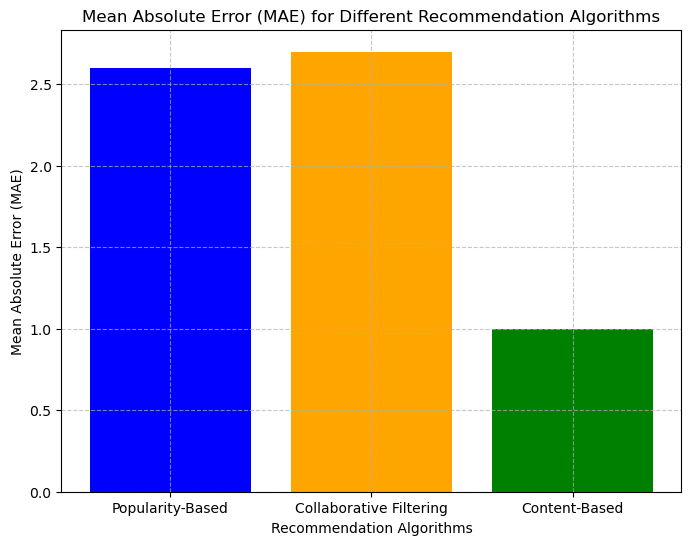

In [43]:
import matplotlib.pyplot as plt

# Prepare the data
algorithms = ['Popularity-Based', 'Collaborative Filtering', 'Content-Based']
mae_values = [2.6, 2.7, 1.0]  # MAE values for each algorithm

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust the size of the figure as needed
plt.bar(algorithms, mae_values, color=['blue', 'orange', 'green'])  # Customize colors as needed

# Add labels and title
plt.xlabel('Recommendation Algorithms')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) for Different Recommendation Algorithms')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()
